In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [17]:
tbl1 = pd.read_excel('Reynolds.xlsx')
tbl1

,S.no,ScalesSold,MonthsEmployed
0,0,275,41
1,1,296,106
2,2,317,76
3,3,376,104
4,4,162,22
5,5,150,12
6,6,367,85
7,7,308,111
8,8,189,40
9,9,235,51


Text(0.5, 0, 'MonthsEmployed')

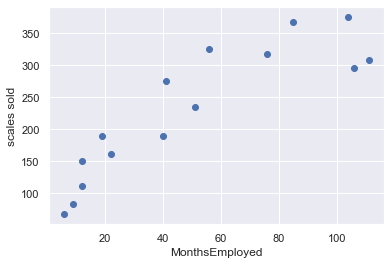

In [18]:
plt.scatter(tbl1['MonthsEmployed'],tbl1['ScalesSold'])
plt.ylabel('scales sold')
plt.xlabel('MonthsEmployed')


Statistical analysis is a scientific tool that helps collect and analyze large amounts of data to identify common patterns and trends to convert them into meaningful information. In simple words, statistical analysis is a data analysis tool that helps draw meaningful conclusions from raw and unstructured data

**Scatter Plot 2 :**

In [19]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  
# set grid style
sns.set(style ="darkgrid")
  
# import dataset
dataset = pd.read_excel('Reynolds.xlsx')

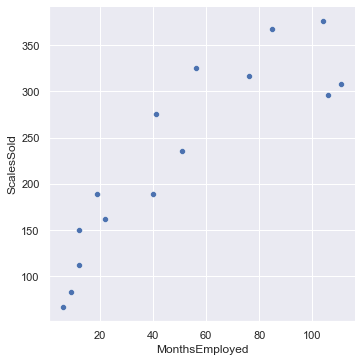

In [20]:

sns.relplot(x ="MonthsEmployed", y ="ScalesSold",
            data = dataset);

**Scatter Plot with Marginal Histograms**

Is basically a joint distribution plot with the marginal distributions of the two variables. In data visualization, we often plot the joint behavior of two random variables (bi-variate distribution) or any number of random variables. But if data is too large, overlapping can be an issue. Hence, to distinguish between variables it is useful to have the probability distribution of each variable on the side along with the joint plot
Using kind=”reg” attribute you can add a linear regression fit and univariate KDE curves.


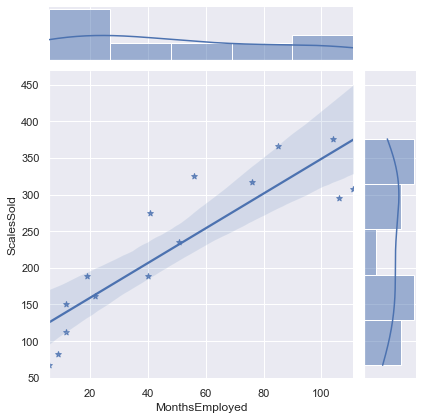

In [21]:
import seaborn as sns
  
# here "*" is used as a marker for scatterplot

#Import Library (Seaborn)
#Import or load or create data.
#Plot the graph with the help of regplot()

sns.jointplot(data=dataset, x="MonthsEmployed", y="ScalesSold", kind="reg", marker="*")

To understand the monthsemployed and scalessold and their relationships more, make a joint plot. Jointplot shows the density of the data and the distribution of both the variables at the same time.

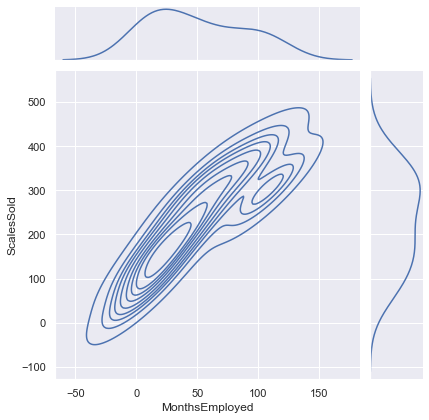

In [22]:
sns.jointplot(x="MonthsEmployed", y="ScalesSold", data=dataset, kind = 'kde')

In this plot, it shows very clearly that the densest area is from 0 to 50 and remaining tends to be a outilers.

**Emphasizing continuity with line plots**

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

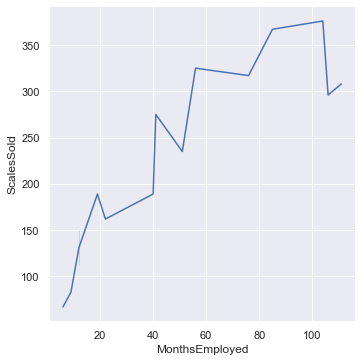

In [23]:
sns.relplot(data=dataset, x ="MonthsEmployed", y ="ScalesSold", kind="line")

**OLS**

Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).

**Significance of Good R-Squared Value**

What qualifies as a “good” R-Squared value will depend on the context. 
In some fields, such as the social sciences, even a relatively 
low R-Squared such as 0.5 could be considered relatively strong. 
In other fields, the standards for a good R-Squared reading can be much higher, such as 0.9 or above. 
In finance, an R-Squared above 0.7 would generally be seen as showing a high level of correlation, 
whereas a measure below 0.4 would show a low correlation. This is not a hard rule, however, and will depend on the specific analysis.

In [24]:
x =tbl1['MonthsEmployed']
y = tbl1['ScalesSold']
x2 = sm.add_constant(x)
model = sm.OLS(y,x2)
Model = model.fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.24e-05
Time:                        02:04:38   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.2279     21.628      5.

/Users/reethu.anand/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [25]:
E=Model.resid_pearson

In [26]:
E

array([ 1.33945744, -1.35645713,  0.50765989,  0.35518943, -0.03063607,
        0.20702037,  1.08543558, -1.35411191, -0.34936157,  0.05163116,
       -1.00208207, -0.56041143, -1.18121025,  1.62923113,  0.65864542])

In [27]:
yhat = Model.predict(x2)
yhat

0     208.675693
1     363.166061
2     291.862814
3     358.412511
4     163.516970
5     139.749221
6     313.253788
7     375.049935
8     206.298918
9     232.443442
10    132.618896
11    139.749221
12    125.488571
13    244.327316
14    156.386645
dtype: float64

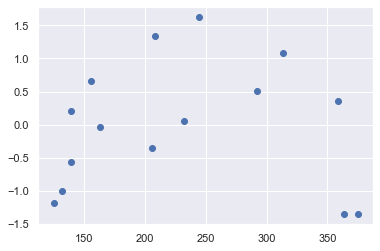

In [28]:
plt.scatter(yhat,E)

In [29]:
X_sq = (x**2)
X_sq

0      1681
1     11236
2      5776
3     10816
4       484
5       144
6      7225
7     12321
8      1600
9      2601
10       81
11      144
12       36
13     3136
14      361
Name: MonthsEmployed, dtype: int64

In [30]:
x_new =np.column_stack((x,X_sq))
x_new2 = sm.add_constant(x_new)
model2 = sm.OLS(y,x_new2)
Model2 = model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           8.75e-07
Time:                        02:04:42   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3476     22.775      1.991      0.0

/Users/reethu.anand/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [31]:
E2=Model2.resid_pearson
E2

array([ 0.797777  , -0.99895952, -0.32984543,  1.27097898, -0.18118441,
        0.97178443,  0.91436152, -0.48542046, -1.59531168, -1.28395183,
       -0.48348828, -0.13117488, -0.44045635,  0.94303218,  1.03185873])

In [32]:
yhat2= Model2.predict(x_new2)

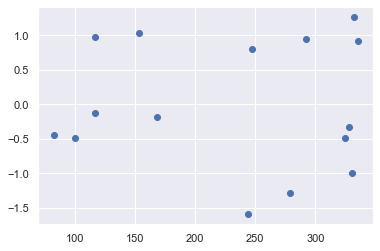

In [33]:
plt.scatter(yhat2,E2)

In [34]:
X = [41, 106, 76, 104, 22, 12, 85, 111, 40, 51]
Y = [275, 296 , 317, 376, 162, 150, 367, 308, 189, 235]

In [35]:
x2 = sm.add_constant(X)
model = sm.OLS(X,x2)
Model = model.fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.462e+31
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          3.05e-123
Time:                        02:04:45   Log-Likelihood:                 301.41
No. Observations:                  10   AIC:                            -598.8
Df Residuals:                       8   BIC:                            -598.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.066e-14   1.48e-14     -0.720      0.4

/Users/reethu.anand/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [36]:
X_sq =  [1681, 11236, 5776, 10816, 484,    144,  7225, 12321, 1600, 2601]
X_sq

[1681, 11236, 5776, 10816, 484, 144, 7225, 12321, 1600, 2601]

In [37]:
x_new =np.column_stack((X,X_sq))
x_new2 = sm.add_constant(x_new)
model2 = sm.OLS(Y,x_new2)
Model2 = model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     16.07
Date:                Mon, 27 Mar 2023   Prob (F-statistic):            0.00242
Time:                        02:04:46   Log-Likelihood:                -48.979
No. Observations:                  10   AIC:                             104.0
Df Residuals:                       7   BIC:                             104.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.2955     48.350      1.495      0.1

/Users/reethu.anand/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [38]:
x_new

array([[   41,  1681],
       [  106, 11236],
       [   76,  5776],
       [  104, 10816],
       [   22,   484],
       [   12,   144],
       [   85,  7225],
       [  111, 12321],
       [   40,  1600],
       [   51,  2601]])